<center> <img src="https://www.iteso.mx/documents/10448/19542899/logoiteso.png/f48e957e-4f61-4752-b06d-9aa45e6e8414?t=1594744730426" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>

<center><font color=#555555><font size=6> I.F. Paola Gómez Manzano </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Ago 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/pgomezman/Laboratorio-1-MyST.git'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Lab 1 </font> <br> <br> <font color= #555555> <font size = 5> Pasive investing vs. Active investing  </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

<font color= #555555> <font size = 4> Abstract </font>

<font color= #6B6B6B> <font size = 3>  In this work we created and analyzed 2 different investing strategies, the first one is a passive portfolio in which we buy the actions once and keep them for the period of time and the second one is active in which we rebalance the portfolio if the shares get certain results.  </font>

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= #6B6B6B> <font size = 3>  In this work, two investment strategies were carried out, one passive and one active, to later compare their results and conclude which could be the best option for an investor who has a capital of 1,000,000 pesos. The shares were taken from an index created with shares belonging to the Mexican Stock Exchange, therefore they are listed in pesos.
    
In the passive strategy, it is simulated that the same shares as the NAFTRAC index are purchased on date 0 and no change is made in the titles, the value of each monthly portfolio is evaluated, and their returns are analyzed.
What is attempted to be simulated in the active strategy is the rebalancing of the NAFTRAC index, the weightings of its assets are not constant, and the index changes its components according to the performance of the companies in order to diversify their investments and generate a better return. 


Finally, we take performance indicators of each strategy such as average return, accumulated return and Sharpe ratio to analyze which strategy is better.
</font>


<br>

# <font color= #6B6B6B> 2. Install/Load Packages and Depedencies </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

## <font color= #6B6B6B> 2.2 Python Packages </font> <font color= #555555>

In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 

- pandas>=1.4.3 
- numpy>=1.19.1
- jupyter>=1.0.0
- _Add any other here_

## <font color= #6B6B6B> 2.3 Files Dependencies </font> <font color= #555555>

The following are the file dependencies that are needed to run this notebook:

- files/precios.csv : Precios históricos
- files/datos.txt : Otros datos históricos

## <font color= #6E6E6E> 2.3 Install Packages</font>

%%capture

# Install all the pip packages in the requirements.txt
import sys
!{sys.executable} -m pip install -r requirements.txt

## <font color= #6E6E6E> 2.4 Load Packages</font>

In [1]:
# Librerías a utilizar
import numpy as np
import time
import pandas as pd
from os.path import isfile, join
from os import listdir, path
from datetime import date
import matplotlib.pyplot as plt
import math
import functions as fn
import pandas_datareader.data as web
# import pandas as pd
#print(glob.__version__)
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

## <font color= #6E6E6E> 2.5 Load Local Data</font>

In [2]:
# Path
abspath = path.abspath('files')

# Files
files = fn.fun_files(abspath)

# Get into files
data_files = fn.fun_datafiles(files)

# Extract dates
dates = fn.fun_dates(files)

# Names in the BMV
tickers = fn.fun_tickerss(data_files, files)

In [3]:
pd.DataFrame(tickers)

,0
0,AC.MX
1,ALFAA.MX
2,ALSEA.MX
3,AMXL.MX
4,ASURB.MX
5,BBAJIOO.MX
6,BIMBOA.MX
7,BOLSAA.MX
8,CEMEXCPO.MX
9,CUERVO.MX


## <font color= #6E6E6E> 2.6 Load web prices</font>

In [4]:
# Precios diarios de internet desde enero 2020 hasta julio 2022
web_prices=fn.closes(tickers, dates[0], dates[-1])
web_prices

Symbols,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,ELEKTRA.MX,FEMSAUBD.MX,GAPB.MX,GCARSOA1.MX,GFINBURO.MX,GFNORTEO.MX,GMEXICOB.MX,GRUMAB.MX,KIMBERA.MX,LABB.MX,LIVEPOLC-1.MX,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,TLEVISACPO.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-31,94.615456,14.103789,45.825001,14.346072,339.708923,25.000610,32.136032,37.607738,7.595000,33.807869,1366.929688,160.300323,216.240250,66.101830,21.424999,105.844650,42.370079,186.317093,34.365944,20.180393,92.458412,63.203468,122.502419,40.384418,197.247894,188.090424,41.303806,53.542740
2020-02-04,96.169998,14.093850,45.849998,14.615719,342.187866,25.088739,32.592335,37.529819,7.945000,34.795952,1364.359497,164.075882,220.965332,67.263809,22.600000,106.049721,45.631268,189.490540,34.286766,20.270689,91.039757,63.529850,123.128777,42.516853,199.836685,188.348434,41.653214,54.905067
2020-02-05,94.924591,13.954700,46.240002,14.524313,348.642487,24.996605,32.302391,37.088291,7.750000,34.708771,1360.484375,165.276337,222.125824,64.905807,22.240000,105.789955,44.998436,188.706436,34.207573,19.963692,89.495926,65.170746,122.753815,42.621426,196.098434,186.841797,40.304802,54.415409
2020-02-06,95.057083,13.577009,46.099998,14.332363,345.808075,24.940521,31.494358,37.460564,7.750000,33.556007,1348.394409,165.596451,221.940887,63.982059,21.400000,105.871994,44.213734,188.363113,34.269161,19.774076,86.992416,63.248177,123.580414,42.257687,192.969894,188.058182,39.733936,53.533047
2020-02-07,95.048248,13.278832,45.200001,14.295799,343.095245,24.628065,31.532381,37.235466,7.790000,32.761665,1375.075562,165.935394,223.771759,64.137634,22.040001,103.894188,43.741207,189.291016,33.952423,18.925327,87.159325,64.339119,122.762321,41.930317,193.109833,186.758865,39.399296,54.299049
2020-02-10,94.690536,13.388164,45.400002,14.067286,344.573273,24.523911,31.347008,37.780888,7.735000,33.289612,1387.017334,166.161346,221.099426,64.463379,22.260000,104.021782,43.939491,188.729660,33.912834,18.826006,87.089775,65.045555,122.890167,41.593861,193.539642,186.081558,39.276260,54.526913
2020-02-11,95.021759,13.924882,45.770000,14.378064,356.547028,24.660112,32.178810,37.226814,8.050000,33.052277,1386.453857,168.402206,227.988266,67.093643,22.680000,105.115501,44.306538,188.919861,36.072803,18.780859,87.622925,63.498562,126.997574,41.502930,196.058456,189.256119,40.787075,54.551151
2020-02-12,93.661530,13.914943,46.060001,15.182432,350.859497,24.916487,32.397457,37.348015,7.650000,33.197586,1376.716553,167.705475,224.576218,67.686790,23.150000,106.446190,43.361515,191.527283,35.184177,19.223293,89.013771,64.392776,128.846756,41.421082,194.908997,187.496048,41.731956,54.541462
2020-02-13,92.734085,13.119802,45.900002,15.209853,342.131744,24.588007,32.074245,37.772228,7.280000,32.790730,1372.722656,166.999313,222.671371,64.905807,23.230000,105.753502,43.445900,188.762115,34.383549,19.656698,88.568695,65.912956,130.355103,40.311672,192.310196,186.703568,40.915031,55.530476


web_prices=pd.read_csv('web_prices_download.csv')
web_prices

<br>

# <font color= #6B6B6B> 3. Data Description </font>

In [5]:
# Prueba de no valores nulos por ticker
pd.DataFrame(web_prices.isnull().sum())

,0
Symbols,
AC.MX,0
ALFAA.MX,0
ALSEA.MX,0
AMXL.MX,0
ASURB.MX,0
BBAJIOO.MX,0
BIMBOA.MX,0
BOLSAA.MX,0
CEMEXCPO.MX,0


<hr style="border:0.02in solid gray"> </hr>

In [6]:
len(web_prices)

630

<font color= #6B6B6B> <font size = 3> From the data downloaded from the internet we can verify that we do not have null values ​​and we have (x) dates. From the dates we know that the stock market is not open every day (it excludes Saturdays, Sundays and holidays), which is why the number of data is less than the number of days in the period of time analyzed. Of all the available tickers, we downloaded 28, which are the ones listed on the NAFTRAC index for the entire period of analysis. </font>

In [7]:
# Capital inicial
c_0=1000000

# % comision
com=0.00125

# Tickers a quitar por tener informacion insuficiente para el periodo
quitar=['KOFUBL','USD', 'BSMXB', 'NMKA','ALPEKA', 'GCC','Q','VESTA', 'GENTERA', 'IENOVA', 'SITESB.1', 'VOLARA', 'RA', 'MXN']

<br>

# <font color= #6B6B6B> 4. Passive investing </font>

<hr style="border:0.02in solid gray"> </hr>

In [8]:
# name es el nombre del csv del cual sacaremos las ponderaciones
name='NAFTRAC_20200131'

# quitar es el vector de tickers que debemos quitar por no tener informacion suficiente
quitar=['KOFUBL','USD', 'BSMXB', 'NMKA','ALPEKA', 'GCC','Q','VESTA', 'GENTERA', 'IENOVA', 'SITESB.1', 'VOLARA', 'RA', 'MXN', 'SITES1A-1']

# c_0 es la inversion inicial
c_0=1000000

# com es la comision por operacion
com=0.00125

inicial_investing=fn.inv_inicial(data_files, name, quitar, c_0, com)
inicial_investing

,Ticker,Peso (%),Precio,# acciones,Total x ticker
14,AC,1.770000,107.01,165.00,17656.65
20,ALFAA,1.510000,14.14,1067.00,15087.38
23,ALSEA,0.860000,45.76,187.00,8557.12
0,AMXL,13.700000,15.69,8731.00,136989.39
9,ASURB,2.750000,363.07,75.00,27230.25
24,BBAJIOO,0.830000,31.16,266.00,8288.56
12,BIMBOA,1.870000,33.81,553.00,18696.93
28,BOLSAA,0.720000,43.52,165.00,7180.80
5,CEMEXCPO,4.300000,7.6,5657.00,42993.20
29,CUERVO,0.670000,35.04,191.00,6692.64


<font color= #6B6B6B> <font size = 3> In the **Initial Investing** dataframe we have the initial weight of each asset listed on the NAFTRAC. To get the number of shares we must do a round down because we cant but fractions of shares. In the column **Total x ticker** we have how much money is invested in each stock and finally we have an account called cash that has all the cash that we have left over, either because the stock did not manage to buy full titles or the asset was eliminated because it is not listed in the entire period of analysis. </font>

In [9]:
# Calculo de variables para los demas portafolios
tickerss=inicial_investing.iloc[0:-1,0].reset_index()
tickerss=tickerss['Ticker']
noacciones=inicial_investing['# acciones'][0:-1]
cashh=inicial_investing.iloc[-1,-1]

In [10]:
y=fn.portafolio_pasiva_web(dates, data_files, quitar, noacciones, web_prices, cashh)
y

C:\Users\pgome\Documents\MyST\Lab1PGM\functions.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portafolio_pasiva['Rend acumulado'][(i+1)]=portafolio_pasiva['Rend'][i]+portafolio_pasiva['Rend'][(i+1)]


,Fecha,Valor Portafolio,Rend,Rend acumulado
0,2020-01-31,1000000.000,0.000,0
1,2020-02-28,883995.624,-0.116,-0.116
2,2020-03-31,757459.605,-0.143,-0.259
3,2020-04-30,798290.613,0.054,-0.089
4,2020-05-29,795699.540,-0.003,0.051
5,2020-06-30,826839.853,0.039,0.036
6,2020-07-31,817493.588,-0.011,0.028
7,2020-08-31,817057.499,-0.001,-0.012
8,2020-09-30,830703.739,0.017,0.016
9,2020-10-30,821507.090,-0.011,0.006


In [11]:
fn.portafolio_pasiva_csv(dates, data_files, quitar, noacciones, cashh)

C:\Users\pgome\Documents\MyST\Lab1PGM\functions.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portafolio_pasiva['Rend acumulado'][(i+1)]=portafolio_pasiva['Rend'][i]+portafolio_pasiva['Rend'][(i+1)]


,Fecha,Valor Portafolio,Rend,Rend acumulado
0,2020-01-31,1000000.000,0.000,0
1,2020-02-28,943427.270,-0.057,-0.057
2,2020-03-31,805846.960,-0.146,-0.202
3,2020-04-30,849292.600,0.054,-0.092
4,2020-05-29,844954.890,-0.005,0.049
5,2020-06-30,877772.200,0.039,0.034
6,2020-07-31,865879.030,-0.014,0.025
7,2020-08-31,862993.330,-0.003,-0.017
8,2020-09-30,876403.120,0.016,0.012
9,2020-10-30,866886.620,-0.011,0.005


<font color= #6B6B6B> <font size = 3> I made a mistake in the portfolio values because initially I take the prices from the csv files given t¿by the professor, however I was able to correct it and in the **y** variable we have the value of the portfolio monthly, and also I calculated the monthly yield and the accumulated yield for each one.</font>

<br>

# <font color= #6B6B6B> 5. Inversión Activa  </font>

<hr style="border:0.02in solid gray"> </hr>

Descargaremos las 3 bases de datos que necesitamos

In [12]:
# Web_prices0 es la base de datos que usaremos para calcular el portafolio eficiente
web_prices0=fn.closes(tickers, '2020-01-31', '2021-01-31')


In [13]:
# Web_prices29 es la base de datos que nos dira el precio del activo en el dia de inicio del rebalance
web_prices29=fn.closes(tickers, '2021-03-01', '2021-03-01')


In [14]:
# Web_prices1 es la base de datos del periodo de rebalance
web_prices1=fn.closes(tickers, '2021-03-01', '2022-07-29')

In [15]:
rf=0.0429/12
c_0=1000000
com=0.00125
portafolio0=fn.portemvrs(web_prices0, rf, tickers, dates, c_0, web_prices29)
portafolio0

C:\Users\pgome\Documents\MyST\Lab1PGM\functions.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Precio']=web_prices29.loc['2021-03-01',a['Activo']].values
C:\Users\pgome\Documents\MyST\Lab1PGM\functions.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['# acciones']= (a['Ponderacion']*c_0/a['Precio']).apply(np.floor)
C:\Users\pgome\Documents\MyST\Lab1PGM\functions.py:237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,Activo,Ponderacion,Precio,# acciones,Total x ticker
8,CEMEXCPO.MX,0.079,14.070,5610.000,78932.698
9,CUERVO.MX,0.170,42.396,3999.000,169541.085
16,GMEXICOB.MX,0.667,89.887,7418.000,666782.283
24,PE&OLES.MX,0.085,288.006,294.000,84673.624


In [16]:
cash0=c_0-portafolio0['Total x ticker'].sum()
cash0

70.30973434448242

In [17]:
# Portafolio radio de sharpe
portafolio0

,Activo,Ponderacion,Precio,# acciones,Total x ticker
8,CEMEXCPO.MX,0.079,14.070,5610.000,78932.698
9,CUERVO.MX,0.170,42.396,3999.000,169541.085
16,GMEXICOB.MX,0.667,89.887,7418.000,666782.283
24,PE&OLES.MX,0.085,288.006,294.000,84673.624


In [18]:
porti=fn.portafolio_activo(portafolio0, web_prices1, c_0, com, cash0)
porti

C:\Users\pgome\Documents\MyST\Lab1PGM\functions.py:281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comprar['dates']=dates1[i+1]
C:\Users\pgome\Documents\MyST\Lab1PGM\functions.py:282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comprar['crecimiento']=compras.values
C:\Users\pgome\Documents\MyST\Lab1PGM\functions.py:267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Fecha,Total,Cash,Rend,Rend acumulado
0,2021-03-02,1000000.000,70.310,0.000,0
1,2021-03-04,1012192.198,2079.595,0.013,0.013
2,2021-03-05,1012464.691,2079.595,0.000,0.014
3,2021-03-08,1047447.961,2079.595,0.035,0.035
4,2021-03-09,1054377.048,2079.595,0.007,0.041
5,2021-03-10,1055287.230,2079.595,0.001,0.007
6,2021-03-11,1065605.452,2079.595,0.010,0.011
7,2021-03-12,1073066.705,2079.595,0.007,0.017
8,2021-03-16,1051174.704,2079.595,-0.020,-0.013
9,2021-03-17,1045625.063,2079.595,-0.005,-0.026


In [19]:
transacciones=fn.transacciones_activo(portafolio0, web_prices1, c_0, com)
transacciones

C:\Users\pgome\Documents\MyST\Lab1PGM\functions.py:382: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comprar['dates']=dates1[i+1]
C:\Users\pgome\Documents\MyST\Lab1PGM\functions.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comprar['crecimiento']=compras.values
C:\Users\pgome\Documents\MyST\Lab1PGM\functions.py:368: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Fecha,Tickers,Precio,# Titulos,Comision,$ Total,Tipo
16,2021-03-02,GMEXICOB.MX,79.567,171.000,17.008,13623.021,Compra
8,2021-03-03,CEMEXCPO.MX,14.370,136.000,2.443,1956.763,Compra
8,2021-03-04,CEMEXCPO.MX,14.370,139.000,2.497,1994.933,Venta
8,2021-03-30,CEMEXCPO.MX,13.930,135.000,2.351,1882.901,Compra
8,2021-04-14,CEMEXCPO.MX,13.960,139.000,2.426,1942.866,Compra
9,2021-04-27,CUERVO.MX,46.099,104.000,5.993,4800.302,Compra
8,2021-04-29,CEMEXCPO.MX,15.250,142.000,2.707,2168.207,Compra
24,2021-05-03,PE&OLES.MX,260.748,6.000,1.956,1566.445,Compra
16,2021-05-10,GMEXICOB.MX,90.629,175.000,19.825,15879.841,Compra
8,2021-05-12,CEMEXCPO.MX,17.100,146.000,3.121,2493.479,Venta


<font color= #6B6B6B> <font size = 3> For the active investment strategy we should include a new column made cash, in this strategy cash account is very important because we depend on it to adjust our portfolio, if the account was in zeros we could not make any adjustments.</font>

<br>

# <font color= #6B6B6B> <font size = 6> 5. Results </font>

<hr style="border:0.02in solid gray"> </hr>

In [20]:
fn.resultados(porti, web_prices1, portafolio0, rf, y, web_prices, inicial_investing)

,Medida,Descripcion,inv_activa,inv_pasiva
0,rend_m,Rendimiento Promedio Mensual,-0.000,0.005
1,rend_c,Rendimiento mensual acumulado,-0.230,0.287
2,sharpe,Sharpe Ratio,0.355,0.257


<br>

## <font color= #6B6B6B> 5.1 Results of passive investing </font>

In [22]:
y

,Fecha,Valor Portafolio,Rend,Rend acumulado
0,2020-01-31,1000000.000,0.000,0
1,2020-02-28,883995.624,-0.116,-0.116
2,2020-03-31,757459.605,-0.143,-0.259
3,2020-04-30,798290.613,0.054,-0.089
4,2020-05-29,795699.540,-0.003,0.051
5,2020-06-30,826839.853,0.039,0.036
6,2020-07-31,817493.588,-0.011,0.028
7,2020-08-31,817057.499,-0.001,-0.012
8,2020-09-30,830703.739,0.017,0.016
9,2020-10-30,821507.090,-0.011,0.006


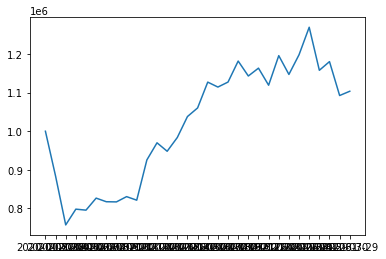

In [24]:
plt.plot(y['Fecha'], y['Valor Portafolio'])

<font color= #6B6B6B> <font size = 3>  The results of the passive investment are very favorable, although its average monthly return is very small, it is positive, which in the long run will give us a positive result, in the accumulated monthly return we have the same 28.7% return, finally, although its sharpe ratio is less than that of active investment.
From the graph we can see that at the beginning the portfolio had a decline, however after the middle of the period it began to stabilize and grow.</font>

<font color= #6B6B6B> <font size = 3> </font>

<br>

## <font color= #6B6B6B> 5.2 Results of active investing </font>

In [25]:
porti

,Fecha,Total,Cash,Rend,Rend acumulado
0,2021-03-02,1000000.000,70.310,0.000,0
1,2021-03-04,1012192.198,2079.595,0.013,0.013
2,2021-03-05,1012464.691,2079.595,0.000,0.014
3,2021-03-08,1047447.961,2079.595,0.035,0.035
4,2021-03-09,1054377.048,2079.595,0.007,0.041
5,2021-03-10,1055287.230,2079.595,0.001,0.007
6,2021-03-11,1065605.452,2079.595,0.010,0.011
7,2021-03-12,1073066.705,2079.595,0.007,0.017
8,2021-03-16,1051174.704,2079.595,-0.020,-0.013
9,2021-03-17,1045625.063,2079.595,-0.005,-0.026


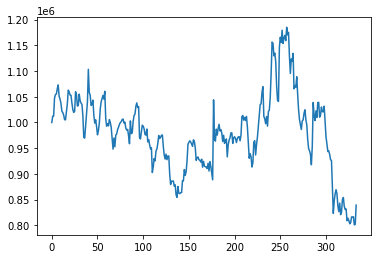

In [27]:
plt.plot( porti['Total'])

<font color= #6B6B6B> <font size = 3> From the active investment we can see that the portfolio is much more volatile, something that we can see is that it remained relatively stable during the first months but in the end it had a quite strong drop, it even decreased to 80% of its original value. Although the active investment had a better sharpe ratio than the passive one, it had few assets, so if there was a strong drop in one of them, it seriously affected it.</font>

<font color= #6B6B6B> <font size = 3> So we finally agree that in this work the passive investment got better results than the active one </font>

<br>

# <font color= #6B6B6B> <font size = 6> 6. References </font>

<hr style="border:0.02in solid gray"> </hr>

[1] Munnoz, 2020. Python project template. https://github.com/iffranciscome/python-project. (2021).

<br>

# <font color= red> TESTS (DO NOT INCLUDE IN THE FINAL NOTEBOOK) </font>

<hr style="border:0.02in solid red"> </hr>

Next are a series of tests to verify that everything is working ok. From correctly installed and loaded packages, to import other scripts, print plots with plotly